<a href="https://colab.research.google.com/github/maheravi/Deep-Learning/blob/main/MLP%20weather%20szeged%20hungary/MLP_weather_szeged_hungary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense

In [34]:
weather_df = pd.read_csv('weatherHistory.csv')

In [35]:
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [36]:
weather_df['Formatted Date'] = pd.to_datetime(weather_df['Formatted Date'], utc=True)
weather_df['day_of_year'] = weather_df['Formatted Date'].dt.dayofyear
weather_df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,day_of_year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,90
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,90
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,91
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,91
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,253
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,253
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,253
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,253


In [37]:
wd = weather_df.set_index('Formatted Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
wd.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),day_of_year
Formatted Date,,,,,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,0.0,1016.660000,365
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,142.750000,11.348487,0.0,1011.985000,1
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,164.583333,8.492079,0.0,1010.384167,2
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,252.541667,9.223958,0.0,1021.170833,3
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,35.000000,8.352546,0.0,981.770833,4


In [38]:
wdd = wd[['Temperature (C)', 'day_of_year']].copy()
wdd.head()

,Temperature (C),day_of_year
Formatted Date,,
2005-12-31 00:00:00+00:00,0.577778,365
2006-01-01 00:00:00+00:00,4.075000,1
2006-01-02 00:00:00+00:00,5.263194,2
2006-01-03 00:00:00+00:00,2.340509,3
2006-01-04 00:00:00+00:00,2.251852,4


In [39]:
wdd.groupby('day_of_year')
wdd.head()

,Temperature (C),day_of_year
Formatted Date,,
2005-12-31 00:00:00+00:00,0.577778,365
2006-01-01 00:00:00+00:00,4.075000,1
2006-01-02 00:00:00+00:00,5.263194,2
2006-01-03 00:00:00+00:00,2.340509,3
2006-01-04 00:00:00+00:00,2.251852,4


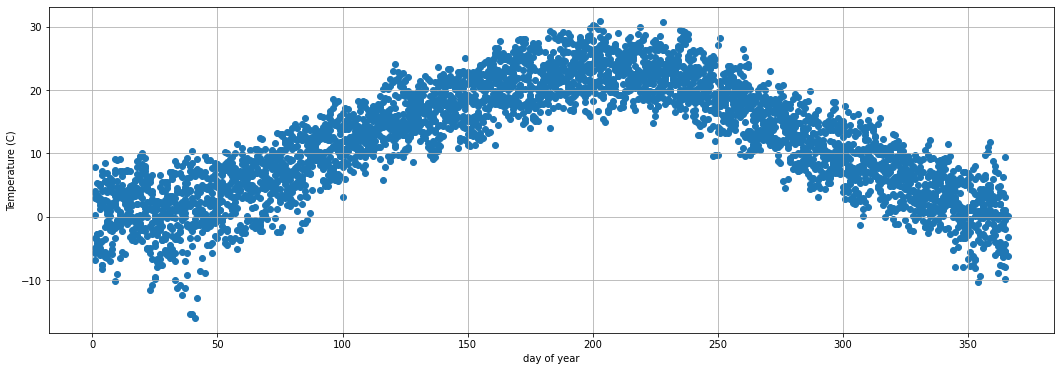

In [40]:
plt.figure(figsize=(18,6)) 
plt.scatter(wdd['day_of_year'], wdd['Temperature (C)'], marker='o')
plt.grid()

plt.ylabel('Temperature (C)')
plt.xlabel('day of year')

plt.savefig('Weather.jpg')

In [43]:
X_train = np.array(wdd['day_of_year'])
Y_train = np.array(wdd['Temperature (C)'])
X_train = X_train.reshape(4019,1)
Y_train = Y_train.reshape(4019,1)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [88]:
model = tf.keras.models.Sequential([
        Dense(64, input_dim = 1, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='relu'),
])

In [89]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error"))

In [90]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
101/101 [==============================] - 1s 2ms/step - loss: 99.1152
Epoch 2/100
101/101 [==============================] - 0s 2ms/step - loss: 96.0915
Epoch 3/100
101/101 [==============================] - 0s 2ms/step - loss: 94.5144
Epoch 4/100
101/101 [==============================] - 0s 2ms/step - loss: 91.2026
Epoch 5/100
101/101 [==============================] - 0s 2ms/step - loss: 91.3390
Epoch 6/100
101/101 [==============================] - 0s 2ms/step - loss: 87.3315
Epoch 7/100
101/101 [==============================] - 0s 2ms/step - loss: 83.0931
Epoch 8/100
101/101 [==============================] - 0s 2ms/step - loss: 78.2802
Epoch 9/100
101/101 [==============================] - 0s 2ms/step - loss: 76.8064
Epoch 10/100
101/101 [==============================] - 0s 2ms/step - loss: 67.0734
Epoch 11/100
101/101 [==============================] - 0s 2ms/step - loss: 56.1526
Epoch 12/100
101/101 [==============================] - 0s 3ms/step - loss: 32.8276
E

In [92]:
y_pred = model.predict(X_test)

In [93]:
mae = tf.keras.losses.MeanAbsoluteError()
mae(y_test, y_pred).numpy()

3.2215388